# Practice: Python for Data Analysis
## Analyzing Ecommerce Purchases

In this notebook, we will practice using Python and the Pandas library to analyze a dataset of ecommerce purchases. 
We will answer questions like "What is the average purchase price?" and "When do people buy more often: AM or PM?".

**Dataset**: [Ecommerce Purchases on Kaggle](https://www.kaggle.com/datasets/utkarsharya/ecommerce-purchases)

### 1. Setup
First, we need to import the libraries we will use.
*   **pandas**: For loading and manipulating the data (like Excel for Python).
*   **matplotlib** and **seaborn**: For creating charts and graphs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set(style="whitegrid")

### 2. Load the Data
We will load the data from a CSV file.
*Make sure the 'ecommerce_purchases.csv' file is in the same folder as this notebook.*

In [2]:
# Load the dataset
df = pd.read_csv('ecommerce_purchases.csv')

# Show the first 5 rows to check if it loaded correctly
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


### 3. Understand the Data
Before analyzing, we should look at the structure of our data.

In [3]:
# Check the number of rows and columns
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

# Get information about data types and missing values
df.info()

Rows: 10000
Columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


### 4. Analysis Questions

**Q1: What are the names of the columns?**
Knowing the exact column names is important for accessing data.

In [4]:
print(df.columns)

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')


**Q2: What is the average, minimum, and maximum Purchase Price?**
We can use `.describe()` or individual functions like `.mean()`, `.min()`, `.max()`.

In [5]:
price_mean = df['Purchase Price'].mean()
price_min = df['Purchase Price'].min()
price_max = df['Purchase Price'].max()

print(f"Average Price: {price_mean:.2f}")
print(f"Lowest Price: {price_min}")
print(f"Highest Price: {price_max}")

Average Price: 50.35
Lowest Price: 0.0
Highest Price: 99.99


**Q3: How many people made purchases in the AM vs PM?**
We can use `.value_counts()` to count the occurrences of each unique value in the 'AM or PM' column.

In [6]:
df['AM or PM'].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

**Q4: What are the top 5 most common job titles?**
Again, `.value_counts()` is very useful here. We can chain `.head(5)` to get just the top 5.

In [7]:
df['Job'].value_counts().head(5)

Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: count, dtype: int64

**Q5: Which Credit Card Provider is the most popular?**

In [8]:
df['CC Provider'].value_counts()

CC Provider
JCB 16 digit                   1716
VISA 16 digit                  1715
JCB 15 digit                    868
American Express                849
Maestro                         846
Voyager                         829
Discover                        817
Mastercard                      816
VISA 13 digit                   777
Diners Club / Carte Blanche     767
Name: count, dtype: int64

**Q6: How many unique languages are represented in the dataset?**
We can use `.nunique()` to count unique values.

In [9]:
num_languages = df['Language'].nunique()
print(f"There are {num_languages} unique languages.")

There are 9 unique languages.


### 5. Visualization
Visualizing data helps us understand distributions and comparisons better than just numbers.

**Plot 1: Distribution of Purchase Prices**
We will use a histogram to see how prices are distributed.

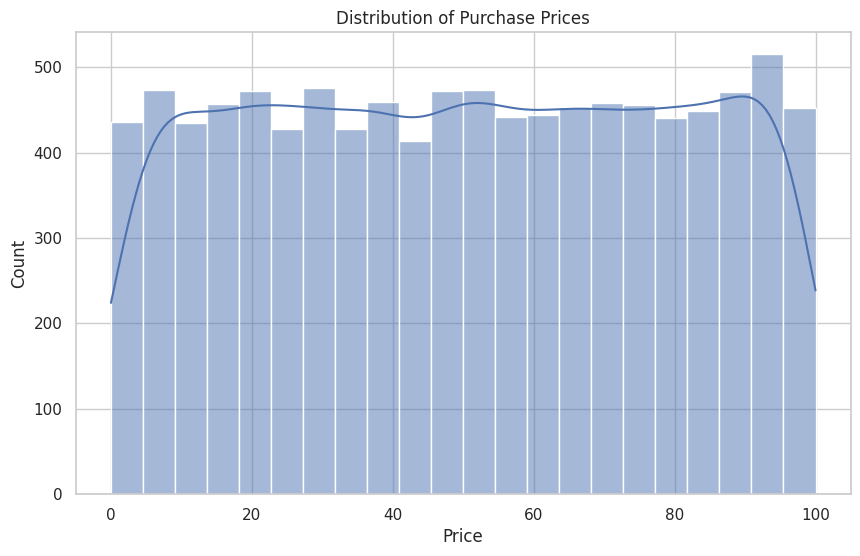

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Price'], kde=True)
plt.title('Distribution of Purchase Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Plot 2: Purchases by Time of Day (AM vs PM)**

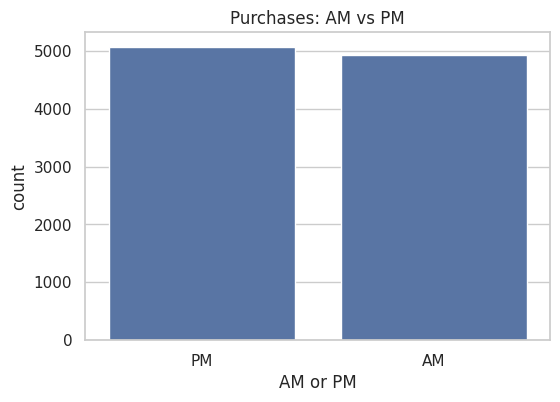

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='AM or PM', data=df)
plt.title('Purchases: AM vs PM')
plt.show()

**Plot 3: Top 10 Credit Card Providers**

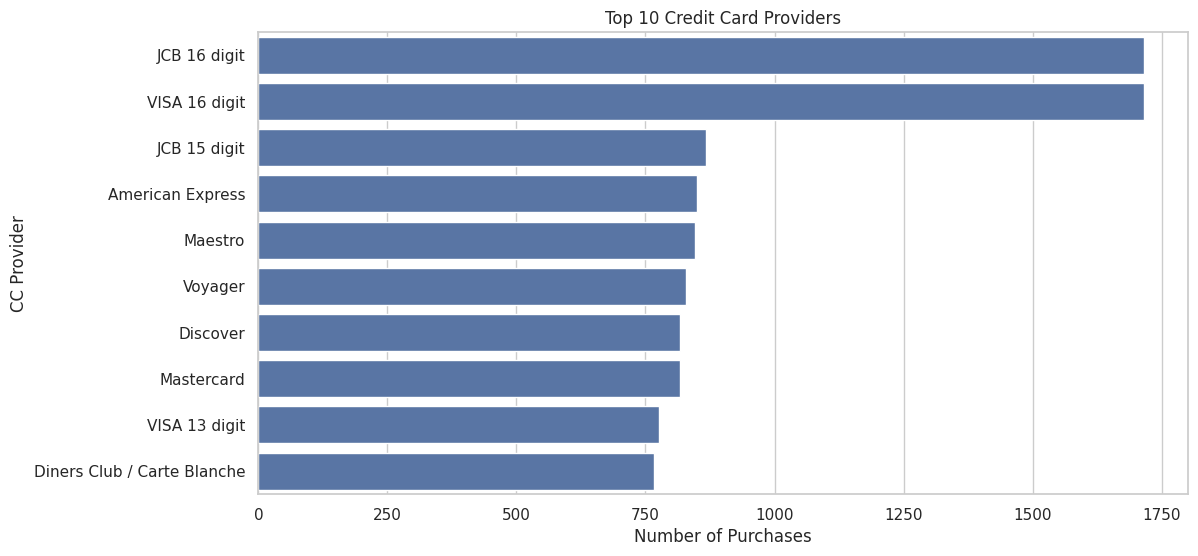

In [12]:
# Get the top 10 providers
top_providers = df['CC Provider'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_providers.values, y=top_providers.index)
plt.title('Top 10 Credit Card Providers')
plt.xlabel('Number of Purchases')
plt.show()

### 6. Advanced / Bonus
**Q: Is the browser 'Chrome'?**
The 'Browser Info' column contains long strings. We can check if the word "Chrome" appears in them.

In [13]:
# Create a new column 'Is_Chrome' that is True if 'Chrome' is in 'Browser Info'
df['Is_Chrome'] = df['Browser Info'].apply(lambda x: 'Chrome' in x)

# Count how many are Chrome vs others
print(df['Is_Chrome'].value_counts())

Is_Chrome
False    8016
True     1984
Name: count, dtype: int64
